# CPS600 - Python Programming for Finance 
###  
<img src="https://www.syracuse.edu/wp-content/themes/g6-carbon/img/syracuse-university-seal.svg?ver=6.3.9" style="width: 200px;"/>

## Financial Time Series

###  October 25, 2018



In [1]:
import pandas as pd
import numpy as np

**First Steps with the `DataFrame`**

In [2]:
# pandas DataFrame class is designed to manage indexed and labeled data 
# Data itself can be provided in different shapes and types 
#    (list, tuple, ndarray, and dict objects).
# Create DataFrame object

df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [3]:
# There is an index that can take on different formats 
# (e.g., numbers, strings, time information).

df.index  # the index values

Index(['a', 'b', 'c', 'd'], dtype='object')

In [4]:
# Data is organized in columns, which can have custom names

df.columns  # the column names

Index(['numbers'], dtype='object')

In [10]:
df.loc['c']  # selection via index

numbers    30
Name: c, dtype: int64

In [6]:
df.ix[['a', 'd']]  # selection of multiple indices

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,numbers
a,10
d,40


In [11]:
df.loc[df.index[1:3]]  # selection via Index object

,numbers
b,20
c,30


In [4]:
df.index[1:3]

Index(['b', 'c'], dtype='object')

In [15]:
df

,numbers
a,10
b,20
c,30
d,40


In [7]:
df.sum(axis=1)  # sum per column

a    10
b    20
c    30
d    40
dtype: int64

In [16]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [18]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [19]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
  # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [20]:
df['floats']  # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [21]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Peter', 'Travis'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Peter
c,30,3.5,Travis
d,40,4.5,Yves


In [22]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
               ignore_index=True)
    # temporary object; df not changed
    # the index gets replaced by a simple numbered index
    # avoid ignoring index

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Peter
2,30,3.50,Travis
3,40,4.50,Yves
4,100,5.75,Henry


In [23]:
# It is  better to append a DataFrame object, 
# providing the appropriate index information

df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,numbers,floats,names
a,10,1.50,Guido
b,20,2.50,Peter
c,30,3.50,Travis
d,40,4.50,Yves
z,100,5.75,Henry


In [24]:
# The following code  adds a new column, but with a slightly different index.
# Pandas by default accepts only values for those indices that already exist. 
# We lose the value for the index y and have a NaN value 
# (i.e., “Not a Number”) at index position z.

df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))
  # temporary object

,numbers,floats,names,squares
a,10,1.50,Guido,1.0
b,20,2.50,Peter,4.0
c,30,3.50,Travis,9.0
d,40,4.50,Yves,16.0
z,100,5.75,Henry,NaN


In [25]:
# we use how=“outer” to use the union of all values from both indices

df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')
df

,numbers,floats,names,squares
a,10.0,1.50,Guido,1.0
b,20.0,2.50,Peter,4.0
c,30.0,3.50,Travis,9.0
d,40.0,4.50,Yves,16.0
y,NaN,NaN,NaN,25.0
z,100.0,5.75,Henry,NaN


In [26]:
df[['numbers', 'squares']].mean()
  # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [27]:
df[['numbers', 'squares']].std()
  # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

**Second Steps with DataFrame Class**

In [93]:
# Let's generate a numpy.ndarry with, with  nine rows and four columns 
# of  pseudorandom, standard normally distributed numbers

a = np.random.standard_normal((9, 4))
a.round(6)

array([[-1.985500e+00, -9.748620e-01,  2.316482e+00, -8.425800e-02],
       [ 7.140000e-04,  1.950669e+00, -1.222839e+00, -5.686010e-01],
       [-9.642510e-01,  9.100640e-01, -3.869720e-01, -5.616400e-01],
       [-8.693500e-02,  5.867450e-01, -2.275285e+00,  1.192219e+00],
       [-1.533826e+00, -3.878340e-01,  4.475800e-01, -5.823500e-01],
       [-1.394570e+00, -2.359788e+00, -1.786899e+00,  1.439917e+00],
       [-5.281610e-01, -4.499670e-01,  2.504859e+00, -2.705220e-01],
       [ 3.685980e-01, -1.498820e-01, -1.304906e+00, -1.042842e+00],
       [ 2.822700e-02, -6.977030e-01, -9.738000e-03, -1.158279e+00]])

In [94]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-1.985500,-0.974862,2.316482,-0.084258
1,0.000714,1.950669,-1.222839,-0.568601
2,-0.964251,0.910064,-0.386972,-0.561640
3,-0.086935,0.586745,-2.275285,1.192219
4,-1.533826,-0.387834,0.447580,-0.582350
5,-1.394570,-2.359788,-1.786899,1.439917
6,-0.528161,-0.449967,2.504859,-0.270522
7,0.368598,-0.149882,-1.304906,-1.042842
8,0.028227,-0.697703,-0.009738,-1.158279


In [7]:
#  Parameters of DataFrame function
# Parameter Format                   Description
# --------- ------                   -----------
# data      ndarray/dict/DataFrame   Data for DataFrame; dict can contain Series, ndarrays, lists
# index     Index/array-like         Index to use; defaults to range(n)
# columns   Index/array-like         Column headers to use; defaults to range(n)
# dtype     dtype, default None      Data type to use/force; otherwise, it is inferred
# copy      bool, default None       Copy data from inputs

In [99]:
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,No1,No2,No3,No4
0,-1.985500,-0.974862,2.316482,-0.084258
1,0.000714,1.950669,-1.222839,-0.568601
2,-0.964251,0.910064,-0.386972,-0.561640
3,-0.086935,0.586745,-2.275285,1.192219
4,-1.533826,-0.387834,0.447580,-0.582350
5,-1.394570,-2.359788,-1.786899,1.439917
6,-0.528161,-0.449967,2.504859,-0.270522
7,0.368598,-0.149882,-1.304906,-1.042842
8,0.028227,-0.697703,-0.009738,-1.158279


In [100]:
df.columns

Index(['No1', 'No2', 'No3', 'No4'], dtype='object')

In [32]:
df['No2'].loc[3]  # value in column No2 at index position 3

No2    0.067533
Name: 3, dtype: float64

In [33]:
# assume that our nine data entries in the four columns correspond to
# month-end data, beginning in January 2015.

# freq = 'M'     Month end frequency  (See Table 6.3)
# periods = 9    number of periods 

dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [82]:
# we assign the newly generated DatetimeIndex 
# as the new Index object to the DataFrame object

df.index = dates
df

,No1,No2,No3,No4
2015-01-31,-0.223773,-0.632451,-1.669138,0.143991
2015-02-28,0.230734,1.317229,0.011095,-0.910279
2015-03-31,-0.021768,0.894276,0.110953,0.646183
2015-04-30,-0.031041,1.055389,-0.297306,0.179135
2015-05-31,1.243623,-1.246282,0.949306,-1.055247
2015-06-30,0.361356,-0.472813,-0.467294,0.188044
2015-07-31,-0.784584,0.222173,-0.820245,2.572906
2015-08-31,0.484065,-0.948094,-0.581043,-0.938547
2015-09-30,-0.155354,1.044066,0.539766,-2.653969


In [35]:
# You can generate a DataFrame object in general from an ndarray object. 
# You can also generate an ndarray object out of a DataFrame by using the function array of NumPy.

np.array(df).round(6)

array([[-1.472727,  0.852144,  0.743174,  0.350744],
       [-0.644485, -0.998382, -0.038649, -0.985248],
       [ 0.007714,  0.634279, -0.649456,  0.713492],
       [ 0.474794,  0.067533, -0.700208,  0.309814],
       [ 0.710978, -0.159839, -0.043638, -0.117871],
       [ 0.831812,  0.05395 ,  0.306022, -0.787363],
       [ 1.331667, -0.249252, -1.205049,  0.587488],
       [ 0.338746, -0.913581,  0.202414, -0.74529 ],
       [-0.938748, -1.04394 ,  0.106201,  0.035294]])

### Basic Analytics

In [36]:
df.sum()   # column-wise sums

No1    0.639750
No2   -1.757088
No3   -1.279189
No4   -0.638940
dtype: float64

In [37]:
df.mean()   # column-wise means

No1    0.071083
No2   -0.195232
No3   -0.142132
No4   -0.070993
dtype: float64

In [39]:
df

,No1,No2,No3,No4
2015-01-31,-1.472727,0.852144,0.743174,0.350744
2015-02-28,-0.644485,-0.998382,-0.038649,-0.985248
2015-03-31,0.007714,0.634279,-0.649456,0.713492
2015-04-30,0.474794,0.067533,-0.700208,0.309814
2015-05-31,0.710978,-0.159839,-0.043638,-0.117871
2015-06-30,0.831812,0.053950,0.306022,-0.787363
2015-07-31,1.331667,-0.249252,-1.205049,0.587488
2015-08-31,0.338746,-0.913581,0.202414,-0.745290
2015-09-30,-0.938748,-1.043940,0.106201,0.035294


In [38]:
df.cumsum()  #column-wise cumulative sums

,No1,No2,No3,No4
2015-01-31,-1.472727,0.852144,0.743174,0.350744
2015-02-28,-2.117212,-0.146239,0.704525,-0.634504
2015-03-31,-2.109498,0.488041,0.055069,0.078988
2015-04-30,-1.634704,0.555574,-0.645139,0.388801
2015-05-31,-0.923727,0.395735,-0.688777,0.270930
2015-06-30,-0.091915,0.449685,-0.382755,-0.516433
2015-07-31,1.239752,0.200433,-1.587804,0.071055
2015-08-31,1.578498,-0.713148,-1.385390,-0.674234
2015-09-30,0.639750,-1.757088,-1.279189,-0.638940


In [40]:
df.describe()   # a number of often-used statistics for numerical data sets

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.071083,-0.195232,-0.142132,-0.070993
std,0.917267,0.689363,0.600418,0.631378
min,-1.472727,-1.043940,-1.205049,-0.985248
25%,-0.644485,-0.913581,-0.649456,-0.745290
50%,0.338746,-0.159839,-0.038649,0.035294
75%,0.710978,0.067533,0.202414,0.350744
max,1.331667,0.852144,0.743174,0.713492


In [41]:
# You can  apply the majority of NumPy universal functions to DataFrame objects

np.sqrt(df)

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


,No1,No2,No3,No4
2015-01-31,NaN,0.923116,0.862075,0.592236
2015-02-28,NaN,NaN,NaN,NaN
2015-03-31,0.087828,0.796417,NaN,0.844685
2015-04-30,0.689053,0.259872,NaN,0.556609
2015-05-31,0.843195,NaN,NaN,NaN
2015-06-30,0.912037,0.232272,0.553192,NaN
2015-07-31,1.153979,NaN,NaN,0.766478
2015-08-31,0.582019,NaN,0.449905,NaN
2015-09-30,NaN,NaN,0.325885,0.187867


In [43]:
# pandas leaves out the NaN values and only works with the other available values

np.sqrt(df).sum(axis=1)

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


2015-01-31    2.377428
2015-02-28    0.000000
2015-03-31    1.728930
2015-04-30    1.505534
2015-05-31    0.843195
2015-06-30    1.697501
2015-07-31    1.920457
2015-08-31    1.031923
2015-09-30    0.513752
Freq: M, dtype: float64

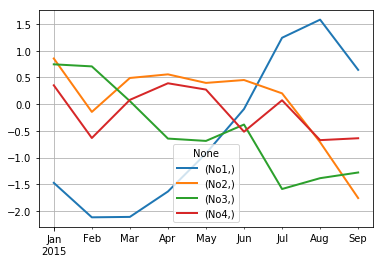

In [44]:
# Plotting of data
# pandas provides a wrapper around matplotplib, specifically designed for DataFrame objects

# Parameters of plot method are listed in table 6.4
#  subplots  Boolean, default False    Plot columns in subplots
#  grid      Boolean, default False    Horizontal and vertical grid lines
#  title     String, default None      Title for the plot
#  legend    Boolean, default True     Legend of labels
#  logx      Boolean, default False    Logarithmic scaling of x-axis
#  logy      Boolean, default False    Logarithmic scaling of y-axis
#  xlim      2-tuple, list             Boundaries for x-axis
#  ylim      2-tuple, list             Boundaries for y-axis
#    etc...

%matplotlib inline
df.cumsum().plot(lw=2.0, # subplots = True
                 grid = True)
# title: Line plot of a DataFrame object

### TimeSeries Class

In [45]:
# we have worked mainly with the pandas DataFrame class

type(df)

pandas.core.frame.DataFrame

In [64]:
type(df.iloc[:,0])

pandas.core.series.Series

In [56]:
df.head()

,No1,No2,No3,No4
2015-01-31,-1.472727,0.852144,0.743174,0.350744
2015-02-28,-0.644485,-0.998382,-0.038649,-0.985248
2015-03-31,0.007714,0.634279,-0.649456,0.713492
2015-04-30,0.474794,0.067533,-0.700208,0.309814
2015-05-31,0.710978,-0.159839,-0.043638,-0.117871


In [58]:
df.

,No1
2015-01-31,-1.472727
2015-02-28,-0.644485
2015-03-31,0.007714
2015-04-30,0.474794
2015-05-31,0.710978
2015-06-30,0.831812
2015-07-31,1.331667
2015-08-31,0.338746
2015-09-30,-0.938748


In [55]:
type(df['No1'])

pandas.core.frame.DataFrame

Text(0.5,1,'Line plot of a TimeSeries object')

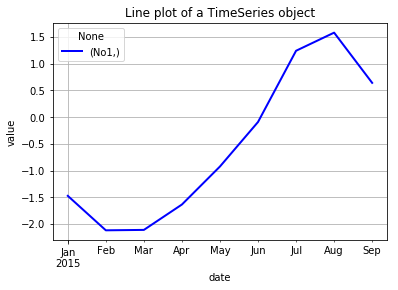

In [65]:
# we can plot Series objets
# style = 'b'     blue line   

%matplotlib inline
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='b', lw=2.)
plt.xlabel('date')
plt.ylabel('value')
plt.grid()
plt.title("Line plot of a TimeSeries object")
# title: Line plot of a TimeSeries object

### GroupBy Operations

In [101]:
# pandas has powerful and flexible grouping capabilities
# similar to grouping in SQL as well as pivot tables in Microsoft Excel

# To have something to group by, we add a column 
# indicating the quarter the respective data

df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
0,-1.985500,-0.974862,2.316482,-0.084258,Q1
1,0.000714,1.950669,-1.222839,-0.568601,Q1
2,-0.964251,0.910064,-0.386972,-0.561640,Q1
3,-0.086935,0.586745,-2.275285,1.192219,Q2
4,-1.533826,-0.387834,0.447580,-0.582350,Q2
5,-1.394570,-2.359788,-1.786899,1.439917,Q2
6,-0.528161,-0.449967,2.504859,-0.270522,Q3
7,0.368598,-0.149882,-1.304906,-1.042842,Q3
8,0.028227,-0.697703,-0.009738,-1.158279,Q3


In [104]:
# Now, we can group by the “Quarter” column

groups = df.groupby('Quarter')

In [105]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.983012,0.628624,0.235557,-0.404833
Q2,-1.005110,-0.720293,-1.204868,0.683262
Q3,-0.043779,-0.432517,0.396738,-0.823881


In [106]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.000714,1.950669,2.316482,-0.084258
Q2,-0.086935,0.586745,0.447580,1.439917
Q3,0.368598,-0.149882,2.504859,-0.270522


In [107]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [108]:
# Grouping can also be done with multiple columns. 
# add another column, indicating whether the month of the index date is odd or even

df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

In [109]:
# grouping based on two columns simultaneously

groups = df.groupby(['Quarter','Odd_Even'])

In [110]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [111]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even      0.000714  1.950669 -1.222839 -0.568601
        Odd      -1.474875 -0.032399  0.964755 -0.322949
Q2      Even     -0.740752 -0.886522 -2.031092  1.316068
        Odd      -1.533826 -0.387834  0.447580 -0.582350
Q3      Even      0.368598 -0.149882 -1.304906 -1.042842
        Odd      -0.249967 -0.573835  1.247560 -0.714401

**Financial Data**

We will use `iexfinance` as before. And we will download some other data from the web.

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from iexfinance import get_historical_data
from datetime import datetime

Here, we are downloading *Apple* stock data (historical).

In [113]:
start = datetime(2014, 2, 9)
#end = datetime(2017, 5, 24)

AAPL = get_historical_data("AAPL", start=start,  output_format='pandas')

In [114]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1187 entries, 2014-02-10 to 2018-10-24
Data columns (total 5 columns):
open      1187 non-null float64
high      1187 non-null float64
low       1187 non-null float64
close     1187 non-null float64
volume    1187 non-null int64
dtypes: float64(4), int64(1)
memory usage: 55.6+ KB


In [115]:
AAPL.shape

(1187, 5)

In [116]:
AAPL.head()

,open,high,low,close,volume
date,,,,,
2014-02-10,68.6475,70.4118,68.5601,70.0147,86451022
2014-02-11,70.2291,71.1741,70.0822,70.9372,70672252
2014-02-12,71.0682,71.4137,70.5772,70.9319,77127064
2014-02-13,70.7651,72.1138,70.7043,72.0583,76960156
2014-02-14,71.7988,72.2634,71.6321,72.0000,68468036


In [117]:
AAPL.tail()

,open,high,low,close,volume
date,,,,,
2018-10-18,217.86,219.74,213.00,216.02,32581315
2018-10-19,218.06,221.26,217.43,219.31,33078726
2018-10-22,219.79,223.36,218.94,220.65,28792082
2018-10-23,215.83,223.25,214.70,222.73,38767846
2018-10-24,222.60,224.23,214.54,215.09,40925163


We can easily visualize...

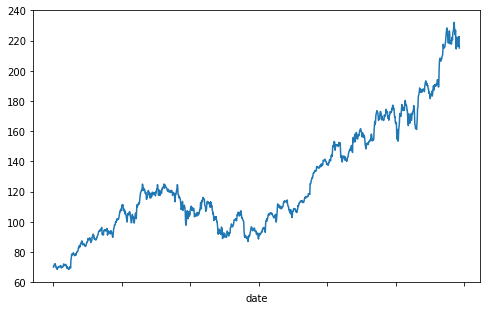

In [118]:
AAPL['close'].plot(figsize=(8,5))

We can take advantage of the vectorization provided by `pandas` in computing a new column:

In [119]:
AAPL['return'] = np.log(AAPL['close'] / AAPL['close'].shift(1))

Sanity Check:

In [120]:
AAPL.close.shift(1)

date
2014-02-10         NaN
2014-02-11     70.0147
2014-02-12     70.9372
2014-02-13     70.9319
2014-02-14     72.0583
2014-02-18     72.0000
2014-02-19     72.2647
2014-02-20     71.1238
2014-02-21     70.3006
2014-02-24     69.5197
2014-02-25     69.8241
2014-02-26     69.0975
2014-02-27     68.4741
2014-02-28     69.8400
2014-03-03     69.6507
2014-03-04     69.8519
2014-03-05     70.3125
2014-03-06     70.4607
2014-03-07     70.2476
2014-03-10     70.2066
2014-03-11     70.2701
2014-03-12     70.9544
2014-03-13     71.0232
2014-03-14     70.2344
2014-03-17     69.4456
2014-03-18     69.7169
2014-03-19     70.3337
2014-03-20     70.3151
2014-03-21     69.9763
2014-03-24     70.5282
                ...   
2018-09-13    221.0700
2018-09-14    226.4100
2018-09-17    223.8400
2018-09-18    217.8800
2018-09-19    218.2400
2018-09-20    218.3700
2018-09-21    220.0300
2018-09-24    217.6600
2018-09-25    220.7900
2018-09-26    222.1900
2018-09-27    220.4200
2018-09-28    224.9500
2018-1

We can now plot these two next two each other with a single line:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff390091438>,
      dtype=object)

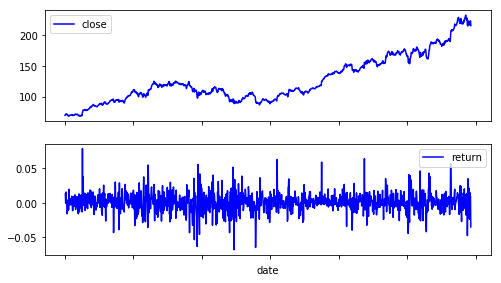

In [121]:
AAPL[['close','return']].plot(subplots=True,style='b',figsize=(8,5))

This is allegedly demonstrating some principles in finance (i.e. *volatility clustering* and *leveraging effect*), but I've substituted different data for the textbook's, so you tell me!

One of the most basic moves one makes in analyzing time series data is to calculate a *rolling average* or *rolling mean*. There's a method for that.

In [122]:
AAPL['42d'] = AAPL.close.rolling(window=42).mean()
AAPL['252d'] = AAPL.close.rolling(window=252).mean()

Finally, we can plot the two of these together.

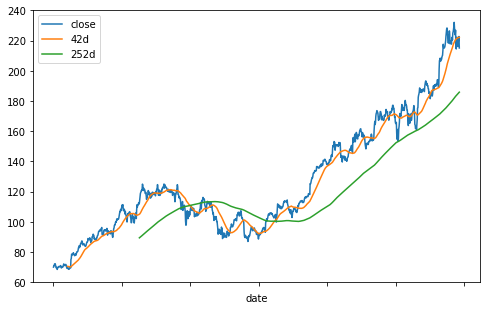

In [123]:
AAPL[['close','42d','252d']].plot(figsize=(8,5))

Another financial metric a trader might want to calculate is the *moving volatility*, which is given by the rolling *standard deviation* of the return.

In [124]:
AAPL['movVol'] = AAPL['return'].rolling(window=252).std()*np.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3624db2b0>,
      dtype=object)

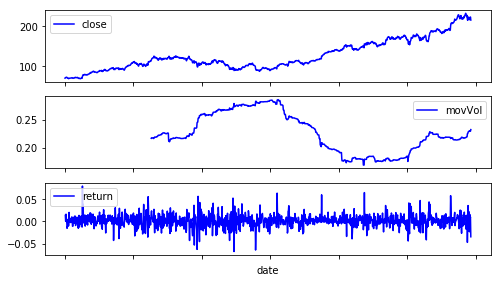

In [125]:
AAPL[['close','movVol','return']].plot(subplots=True,style='b',figsize=(8,5))

This seems to do a better job of illustrating those two principles mentioned above.

**Regression**

Let's talk about quantifying and automatically detecting the patterns we find in plots like the ones we made above. This is *regression analysis* and is basically glorified curve-fitting.

The first step is to get our hands on some nice new data from [Stoxx](stoxx.com).

In [126]:
# Necessary imports (the latter for later)
from urllib.request import urlretrieve
import statsmodels.api as sm

# Here downloading the data
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
urlretrieve(es_url, 'es.txt')
urlretrieve(vs_url, 'vs.txt')

('vs.txt', <http.client.HTTPMessage at 0x7ff3559cb1d0>)

(might take a moment)

Now that we have this data...what is it?

* EURO STOXX 50 index
    >  Historical	daily	closing	values	of	the	EURO	STOXX	50	index,	composed	of European	blue-chip	stocks
* VSTOXX
    > Historical daily closing	data for the VSTOXX volatility index, calculated	on	the	basis of volatilities implied by options on	the	EURO STOXX 50 index

The first of these, call it `es`, needs some formatting changes. You can reverse engineer the following cell if you feel like it; I think it is really not interesting.

In [127]:
with open('es.txt', 'r') as f:
    lines = f.readlines()

lines = [line.replace(' ', '') for line in lines]

with open('es50.txt', 'w') as new_file:
    new_file.writelines('date' + lines[3][:-1]
                        + ';DEL' + lines[3][-1])
        # writes the corrected third line of the orginal file
        # as first line of new file
    new_file.writelines(lines[4:])
        # writes the remaining lines of the orginial file

new_lines = open('es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

It is ready to be read in.

In [128]:
es = pd.read_csv('es50.txt',index_col=0,parse_dates=True,sep=';',dayfirst=True)

In [131]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
date,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0


See that little guy on the end? We don't need that little guy.

In [130]:
del es['DEL']

We also want the VSTOXX set. That one is already nice.

In [132]:
vs = pd.read_csv('vs.txt',index_col=0,parse_dates=True,header=2,sep=',',dayfirst=True)

In [133]:
import datetime as dt # Needed for next thing

In [134]:
# Just one column, filtered, from the first
data = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})

# Combining with another column, also filtered, from the second
data = data.join(pd.DataFrame({'VSTOXX' :
                     vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

We  fill missing values with the last available values from the time series. 

We call the fillna method, providing ffill (for forward fill) as the method parameter


In [135]:
data.head()

,EUROSTOXX,VSTOXX
date,,
1999-01-04,3543.10,18.2033
1999-01-05,3604.67,29.6912
1999-01-06,3685.36,25.1670
1999-01-07,3627.87,32.5205
1999-01-08,3616.57,33.2296


In [136]:
data = data.fillna(method='ffill')

Let's take a look

In [137]:
data.tail()

,EUROSTOXX,VSTOXX
date,,
2016-09-28,2991.11,35.6846
2016-09-29,2991.58,35.6846
2016-09-30,3002.24,35.6846
2016-10-03,2998.50,35.6846
2016-10-04,3029.50,35.6846


Looking good! How about a look at the plot?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3559cbba8>,
      dtype=object)

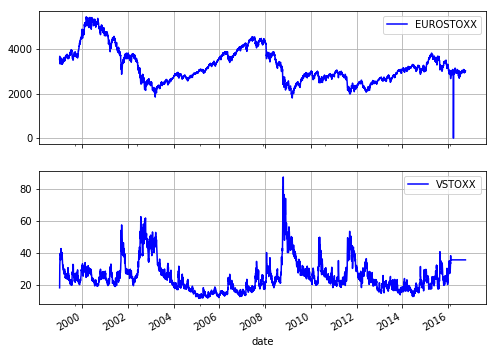

In [138]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

We can also quickly look at the log returns of the two quantities in question.

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3556dad68>,
      dtype=object)

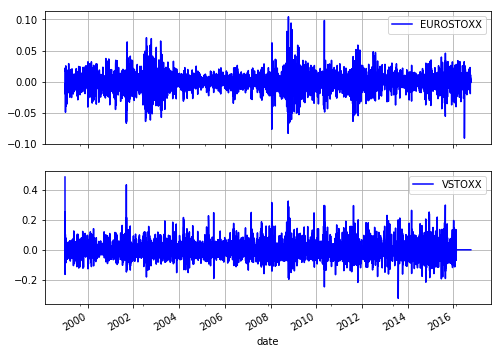

In [140]:
# Calculating - massive broadcasting here
rets = np.log(data / data.shift(1)) 
rets.dropna(inplace=True)

rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

Now we are ready to hit it with the linear regression hammer. We take the `es` values as the *independent* or *predictor* variable, and the `vs` variables as the *dependent* or *response* variable.

There is unfortunately some nasty stuff in there, so lets get rid of it first.

In [142]:
rets.dropna(inplace=True)
rets = rets[(rets.EUROSTOXX != np.inf) & (rets.EUROSTOXX != -np.inf)] # Removes infinity values

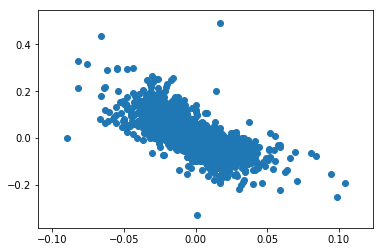

In [144]:
plt.scatter(xdat,ydat)

In [143]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']

The model is now very easy to do:

In [145]:
model = sm.OLS(ydat, xdat) # Create model object
olsres = model.fit() # Do the fit; an optimization

In [150]:
olsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VSTOXX   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     5039.
Date:                Thu, 25 Oct 2018   Prob (F-statistic):               0.00
Time:                        14:58:36   Log-Likelihood:                 8261.8
No. Observations:                4550   AIC:                        -1.652e+04
Df Residuals:                    4549   BIC:                        -1.652e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EUROSTOXX     -2.7539      0.039    -70.985      0.000      -2.830      -2.678
==============================================================================
Omnibus:                     1296.560   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24644.094
Skew:                           0.875   Prob(JB):                         0.00
Kurtosis:                      14.266   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's plot the line of predicted values for this sucker together with a scatterplot of the original data.

In [147]:
preds = olsres.predict(xdat) # Getting the predictions.

In [148]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

p = figure(plot_width=400, plot_height=400)

p.circle(xdat, ydat, size=20, color="navy", alpha=0.5)

p.line(xdat,preds,color='firebrick')

show(p)

Loading BokehJS ...

Nice!